<a href="https://colab.research.google.com/github/Koti-RK/Playstore-App-Review-Analysis/blob/main/PlayStore_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [94]:
#Importing necessary Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
#Importing data
df = pd.read_csv("/content/drive/MyDrive/PlayStore App Review Analysis/Play Store Data.csv")

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [97]:
df.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [98]:
#Checking the no of rows and colums
df.shape

(10841, 13)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


By diagnosing the data frame, we know that:

There are 13 columns of properties with 10841 rows of data.
Column 'Reviews', 'Size', 'Installs' and 'Price' are in the type of 'object'
Values of column 'Size' are strings representing size in 'M' as Megabytes, 'k' as kilobytes and also 'Varies with devices'.
Values of column 'Installs' are strings representing install amount with symbols such as ',' and '+'.
Values of column 'Price' are strings representing price with symbol '$'.
Hence, we will need to do some data cleaning.

In [100]:
#Description of numerical data
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [101]:
#Checking Null Values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

<Axes: >

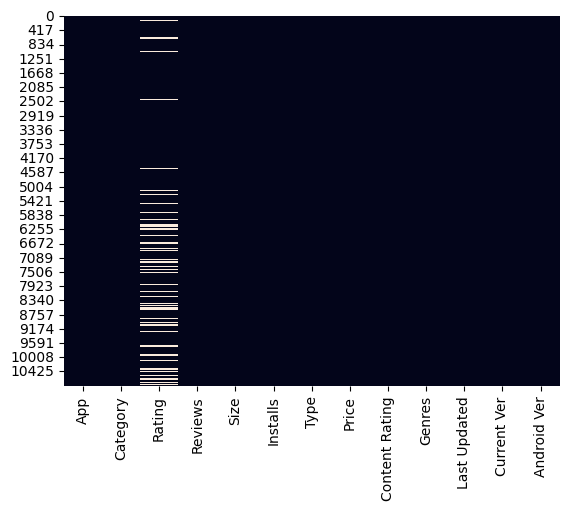

In [102]:
#Heatmap for null values
sns.heatmap(df.isnull(), cbar=False,)

**DATA** **CLEANING**

In [103]:
#checking unique values in Apps column
df.App.value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

In [104]:
#Checking the duplicate values
df[df.duplicated()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [105]:
#Removing the duplicate items
df.drop_duplicates(subset = 'App', inplace = True)

In [106]:
df.shape

(9660, 13)

In [112]:
df['App'].value_counts()

Photo Editor & Candy Camera & Grid & ScrapBook    1
Tic Tac CK                                        1
INFAMY RO                                         1
CK Call NEW                                       1
Ck Coif                                           1
                                                 ..
Bike Race Free - Top Motorcycle Racing Games      1
Dance School Stories - Dance Dreams Come True     1
3D Bowling                                        1
Mind Games Pro                                    1
iHoroscope - 2018 Daily Horoscope & Astrology     1
Name: App, Length: 9659, dtype: int64

Now we can see that duplicate items are removed.

In [107]:
# Checking the 'Installs' column
df['Installs'].value_counts()

1,000,000+        1417
100,000+          1112
10,000+           1031
10,000,000+        937
1,000+             888
100+               710
5,000,000+         607
500,000+           505
50,000+            469
5,000+             468
10+                385
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Free                 1
Name: Installs, dtype: int64

In [108]:
#Removing the row with corresponding value of Installs as Free as it is only one and is negligible
df = df[df.Installs != 'Free']

In [109]:
df.shape

(9659, 13)

# **Clean the 'Installs' data and change the type 'object' to 'float'**

In [110]:
#We have to remove '+' and ',' character from installs colums to work on data more effectively
def remove_char(col):
  if '+' and ',' in col:
    new = int(col[:-1].replace(',',''))
    return new
  elif '+' in col:
    new1 = int(col[:-1])
    return new1
  else:
    return int(col)

In [111]:
df['Installs'] = df['Installs'].apply(lambda x : remove_char(x))
df.head()

<ipython-input-111-6183bf49984d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Installs'] = df['Installs'].apply(lambda x : remove_char(x))


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [113]:
df.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,5000,Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,100000,Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,1000,Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,10000000,Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


# **Clean the 'Reviews' data and change the type 'object' to 'float'**

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   object 
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   int64  
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.0+ MB


We can see that Reviews column is of object data type

In [116]:
df['Reviews'].value_counts()

0         593
1         272
2         213
3         170
4         137
         ... 
157506      1
351254      1
49211       1
88860       1
398307      1
Name: Reviews, Length: 5330, dtype: int64

In [117]:


df['Reviews'] = df['Reviews'].astype(float)

# **Changing the datatype of the Last Updated column from string to datetime**

In [118]:
df["Last Updated"] = pd.to_datetime(df['Last Updated'])
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000,Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


# **Clean the 'Size' data and change the type 'object' to 'float'**


From the size column we can observe that size of an app is in two formats MB and KB..For the sake uniformatity we need to need to convert KB into MB.
We know that 1MB = 1024KB .. so we need to divide KB by 1024 to covert into format of MB.



In [119]:
# Converting KB to MB 
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(x))

In [120]:
df.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38.0,9.800,5000,Free,0,Everyone,Maps & Navigation,2018-06-13,2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195.0,0.582,100000,Free,0,Everyone,Weather,2014-02-16,6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44.0,0.619,1000,Free,0,Everyone,Books & Reference,2014-03-23,0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7.0,2.600,500,Free,0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0.0,9.600,10,Free,0,Everyone,Business,2016-09-29,1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.000,5000,Free,0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.600,100,Free,0,Everyone,Education,2018-07-06,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9.500,1000,Free,0,Everyone,Medical,2017-01-20,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,NaN,1000,Free,0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307.0,19.000,10000000,Free,0,Everyone,Lifestyle,2018-07-25,Varies with device,Varies with device


# **Clean the 'Price' data and change the type 'object' to 'float'**

In [121]:
prices = [i for i in df['Price']]

def clean_prices(prices_list):
    cleaned_data = []
    for price in prices_list:
        if '$' in price:
            price = price.replace('$', '')
        cleaned_data.append(price)
    return cleaned_data

df['Price'] = clean_prices(prices)
df['Price'] = df['Price'].astype(float)

Dealing With NULL Values



In [122]:
#Checking null values
df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

We can see that there are lot of null values in 'Ratings' and 'Size' columns . We cant drop them because they account for more than 10% of the data and by doing so it will affect the data.. We can ignore the columns with less null values since they amount to the negligible part of the data.


Calculating The mean and median for Rating Column

In [123]:
mean = df['Rating'].mean()
mean

4.173243045387994

In [124]:
median = df['Rating'].median()
median

4.3

**Checking for outliers using distplot and boxplot.**

<ipython-input-125-431330f235c5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rating'],color='blue',bins=30)


<Axes: xlabel='Rating', ylabel='Density'>

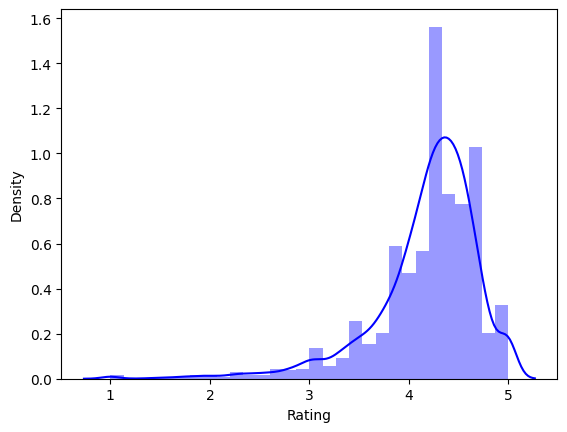

In [125]:
sns.distplot(df['Rating'],color='blue',bins=30)


<Axes: xlabel='Rating'>

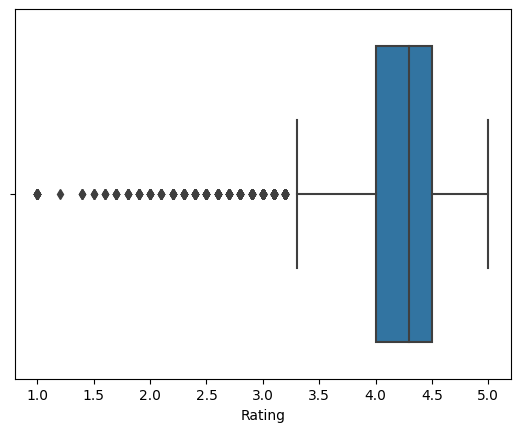

In [126]:
sns.boxplot(x='Rating', data = df)

From the above visuals we can see that there is more distribution to the right.Therefore, the median is a better representation of the majority of the values in the variable.

Although the Rating column is a categorical data, it is not wise to replace data with mode because there are more null values.

In [127]:
df['Rating'].fillna(value=median,inplace=True)

In [128]:
df.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1227
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

there are negligible null values in Type, current version and Android version column. Dropping those columns will not affect data since they amount to less than one percent. So we shall drop them.

In [129]:
df.dropna(subset = ['Type','Current Ver','Android Ver'], inplace = True)

In [130]:
df.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1226
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

Size coulumn contains 1226 null values which are 'Varied with device' . We cant replace them with any other value because average value doesnt necessarily approx value of Size of any app. We cant do the same as we did with Rating column because in Rating column we know values can be only from 1 to 5 so we took the medain average.. Here in the Size column we can say so since the Size of an app can be different random sizes.

So we leave the Size as it is.


# Since we have Successfully cleaned the data. Let us draw some insights from the data using some visualisations.

# **Finding Top genres by no. of installs**

In [131]:
top_genres = df.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})
genres_installs = df.groupby(['Genres'])[['Installs']].sum()
top_genres_installs = pd.merge(top_genres, genres_installs, on='Genres')
top_20_genres_installs = top_genres_installs.head(20)

<Axes: title={'center': 'Top 20 Genres'}, xlabel='Genres', ylabel='Count'>

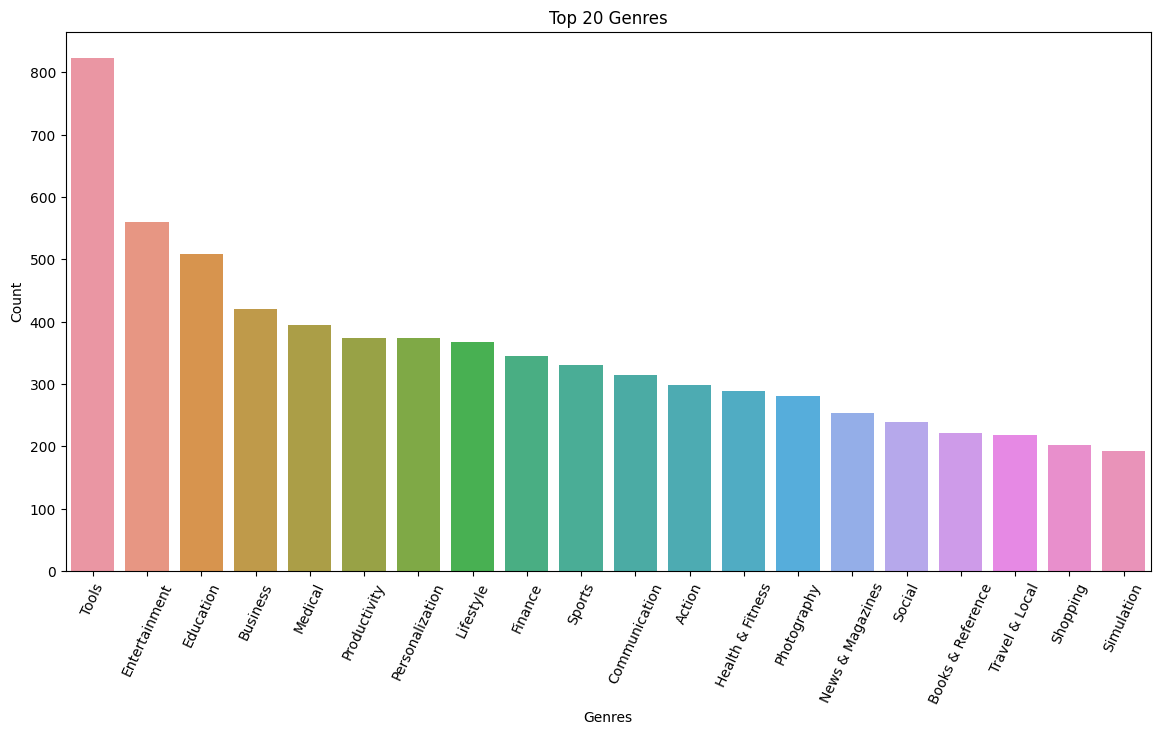

In [132]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Number of application")
plt.title("Top 20 Genres")
sns.barplot(x = top_20_genres_installs.Genres, y = top_20_genres_installs.Count)

We can see from the abov that Maxinum number of apps present in google play store comes under Tools, Entertainment and Education Genres.

# **Which are the Genres that are getting installed the most in top 20 Genres?**

<Axes: title={'center': 'Installs according to Genres'}, xlabel='Genres', ylabel='Installs'>

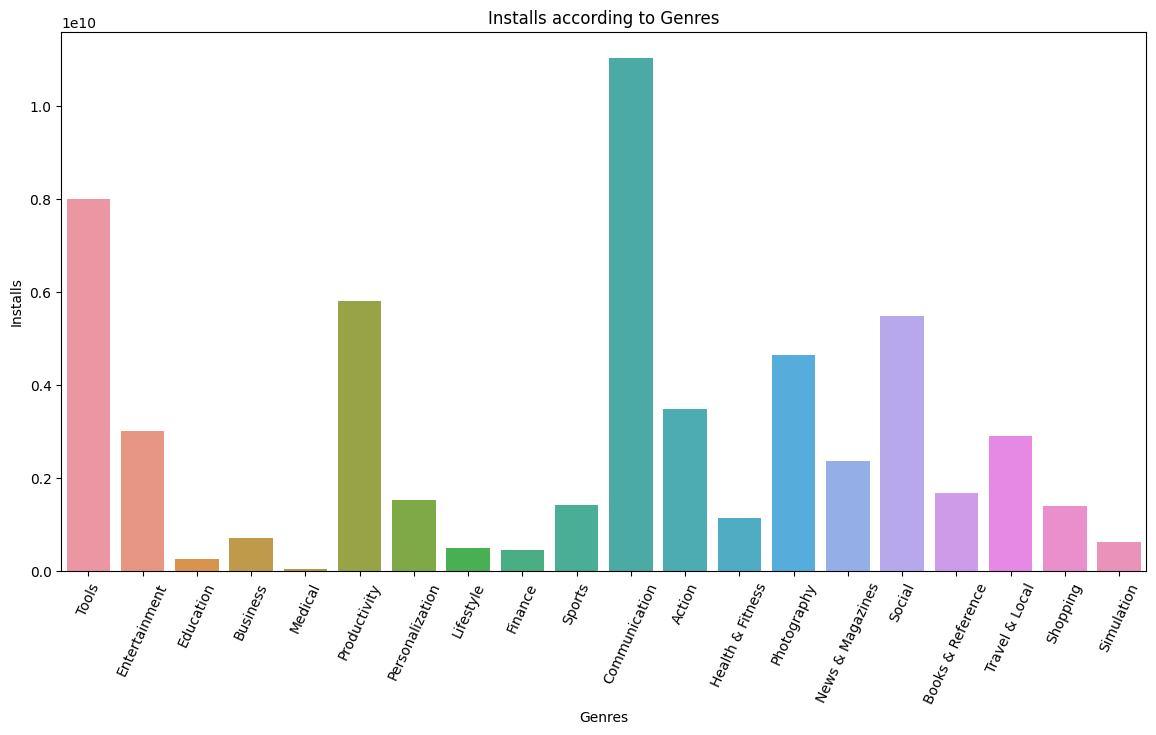

In [133]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Installs")
plt.title("Installs according to Genres")
sns.barplot(x = top_20_genres_installs.Genres, y = top_20_genres_installs.Installs)

As per the installation and requirement in the market plot,Maximum installed apps comes under Communication, Tools and Productivity Genres.

# **Total app installs in each category of the play store**

Text(0.5, 1.0, 'Total app installs in each category')

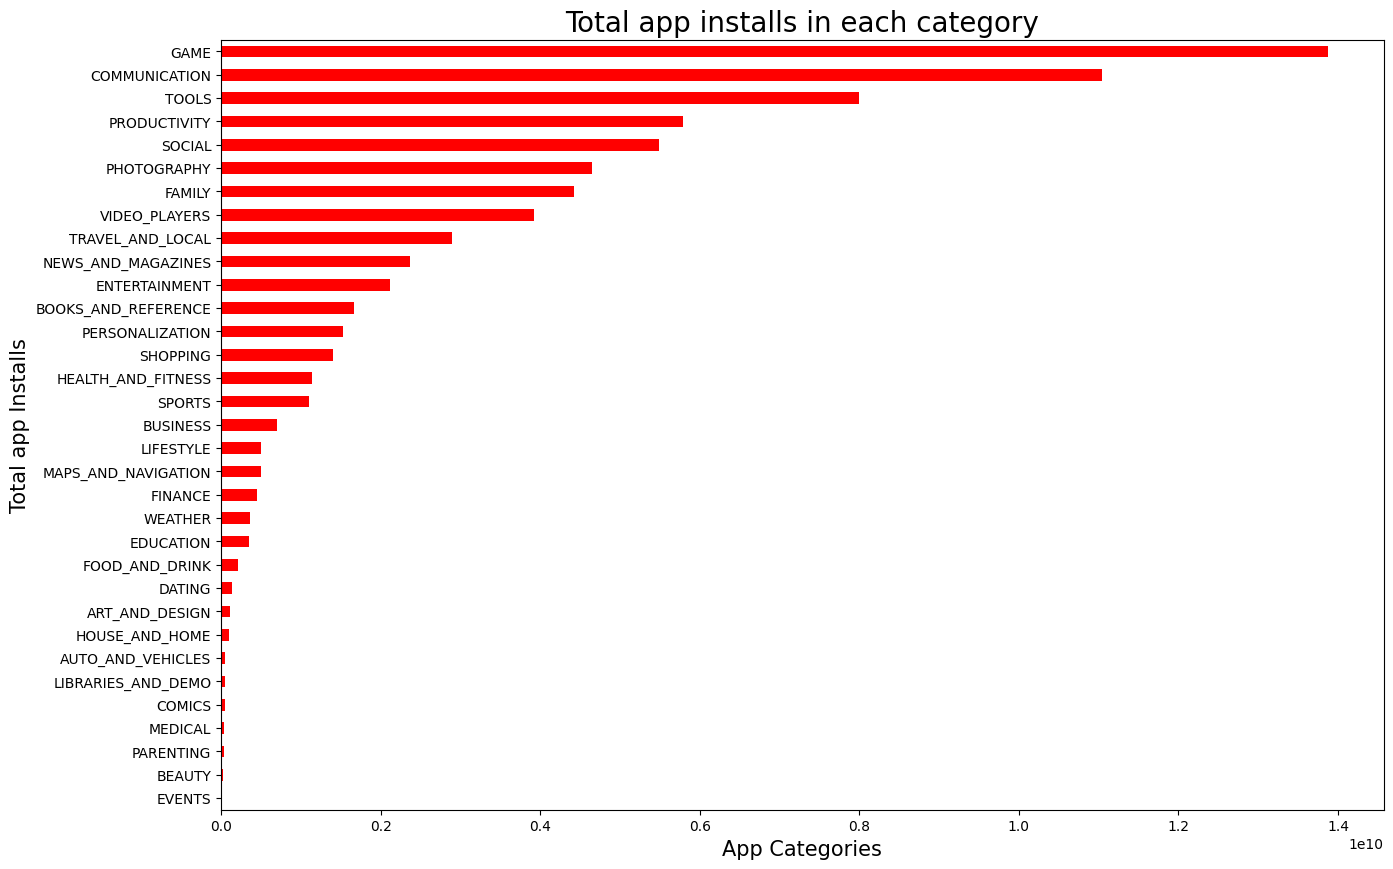

In [134]:
a = df.groupby(['Category'])['Installs'].sum().sort_values()
a.plot.barh(figsize=(15,10), color = 'r', )
plt.ylabel('Total app Installs', fontsize = 15)
plt.xlabel('App Categories', fontsize = 15)
plt.xticks()
plt.title('Total app installs in each category', fontsize = 20)

This tells us the category of apps that has the maximum number of installs. The Game, Communication and Tools categories has the highest number of installs compared to other categories of apps.

# **Average App Ratings**

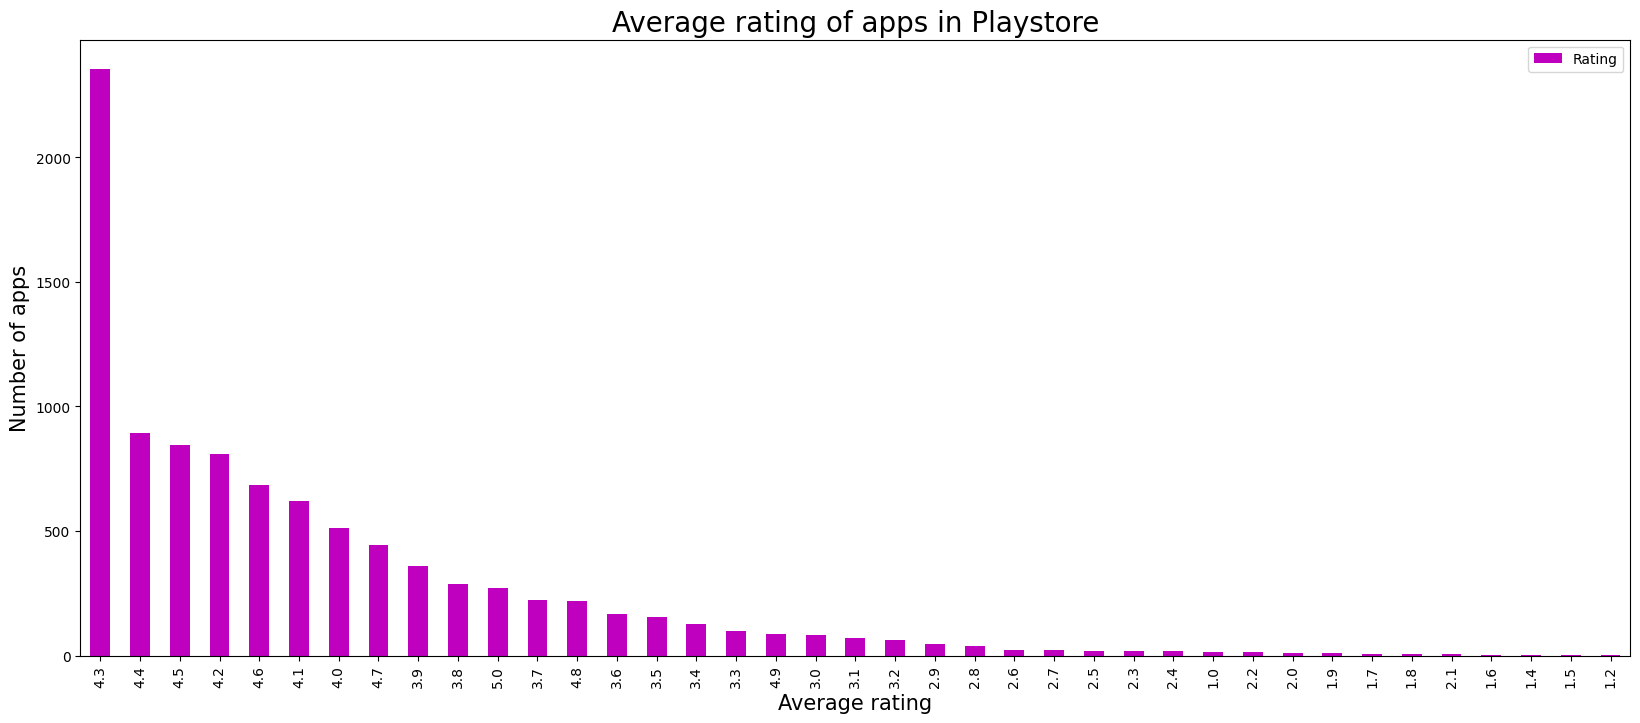

In [135]:
df['Rating'].value_counts().plot.bar(figsize=(20,8), color = 'm' )
plt.xlabel('Average rating',fontsize = 15 )
plt.ylabel('Number of apps', fontsize = 15)
plt.title('Average rating of apps in Playstore', fontsize = 20)
plt.legend()

Lets us represent rating in a better way :    

Top rated = 4-5
Above Average = 3-4
Average = 2-3
Below Average = 1-2

In [136]:
def Rating_app(val):    #This function help to categories the rating from 1 to 5 as Top_rated,Above_average,Average & below Average
  if val>=4:
    return 'Top rated'
  elif val>3 and val<4:
    return 'Above Average'
  elif val>2 and val<3:
    return 'Average'
  else:
    return 'Below Average'

In [137]:
df['Rating_group']=df['Rating'].apply(lambda x: Rating_app(x))

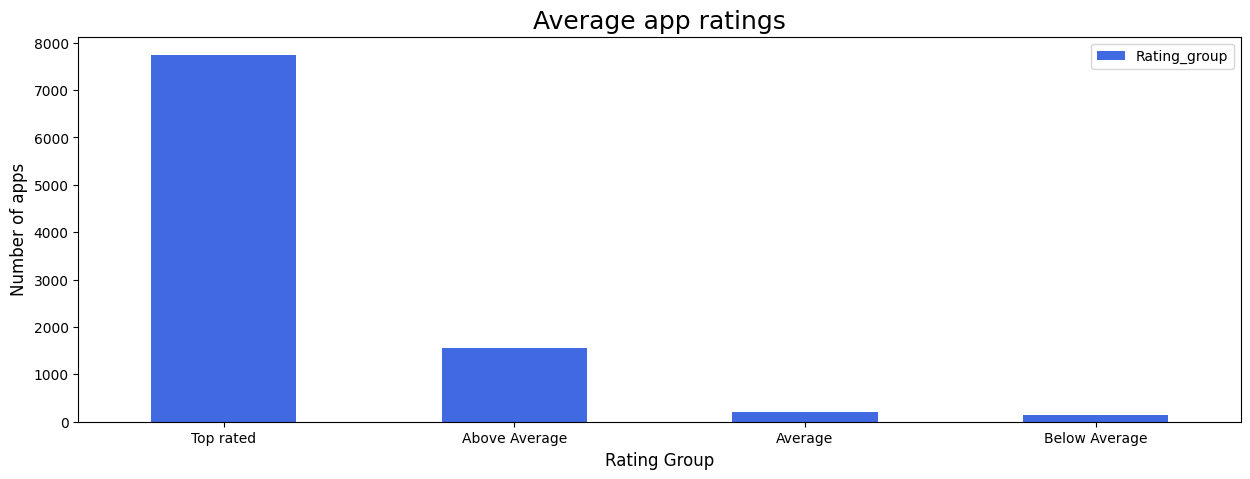

In [138]:
df['Rating_group'].value_counts().plot.bar(figsize=(15,5), color = 'royalblue')
plt.xlabel('Rating Group', fontsize = 12)
plt.ylabel('Number of apps', fontsize = 12)
plt.title('Average app ratings', fontsize = 18)
plt.xticks(rotation=0)
plt.legend()

Majority of Apps are Top Rated.

# **Rating**

Text(0, 0.5, 'Number of Apps')

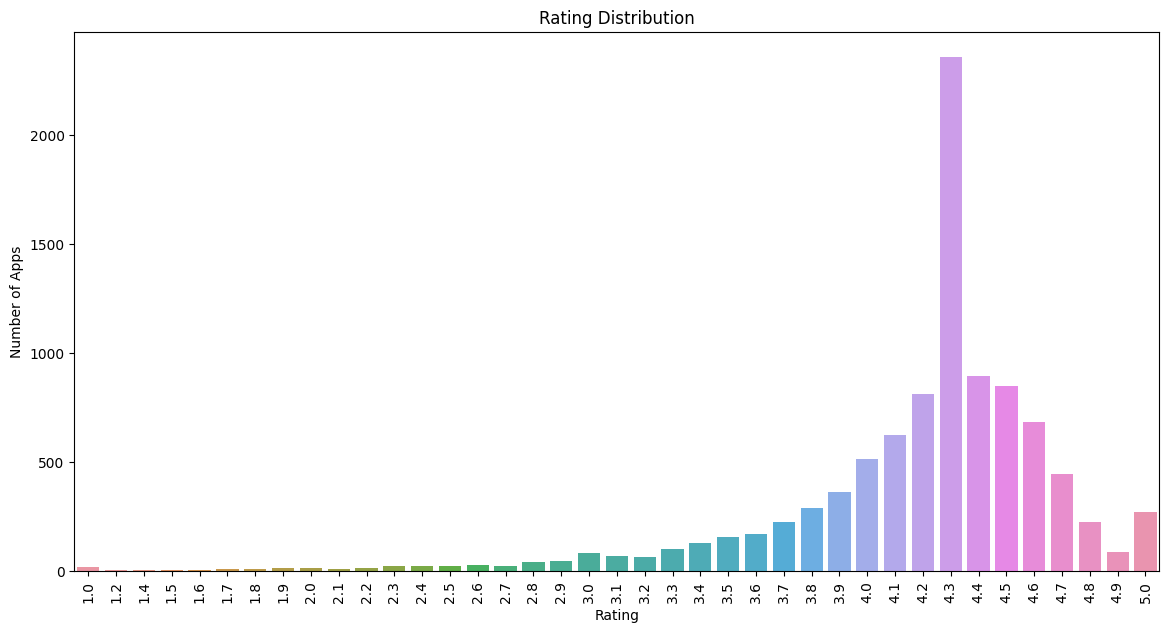

In [139]:
plt.figure(figsize=(14, 7))
sns.countplot(x='Rating', data=df)
plt.title('Rating Distribution')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')

From this distribution plotting, it implies that most of the apps in the Play Store are having rating higher than 4 or in the range of 4 to 4.7.

# **Application Type**

([<matplotlib.patches.Wedge at 0x7f0e90935390>,
 [Text(-1.0670996103148391, 0.2670176429862243, 'Free'),
  Text(1.0670995978148399, -0.2670176929407621, 'Paid')],
 [Text(-0.5820543328990031, 0.14564598708339507, '92%'),
  Text(0.5820543260808217, -0.14564601433132476, '8%')])

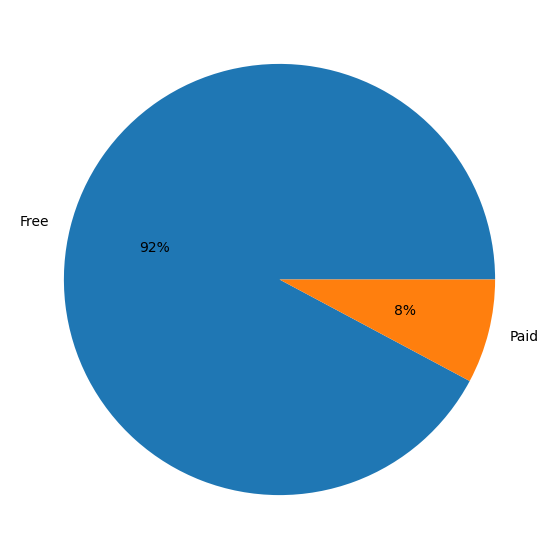

In [140]:
plt.figure(figsize=(14, 7))
plt.pie(df.Type.value_counts(), labels=['Free', 'Paid'], autopct='%1.0f%%')

From the plot we can observe that majority of the apps in the Play Store are Free apps.

# **Top Apps that are of Free Type**

In [141]:
 free_df = df[df['Type'] == 'Free']

In [142]:
top_free_df = free_df[free_df['Installs'] == free_df['Installs'].max()]
top10free_apps=top_free_df.nlargest(10, 'Installs', keep='first')
top10free_apps.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_group
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233.0,NaN,1000000000,Free,0.0,Teen,Books & Reference,2018-08-03,Varies with device,Varies with device,Above Average
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,Top rated
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,Top rated
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995.0,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,Top rated
340,Gmail,COMMUNICATION,4.3,4604324.0,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-02,Varies with device,Varies with device,Top rated
341,Hangouts,COMMUNICATION,4.0,3419249.0,NaN,1000000000,Free,0.0,Everyone,Communication,2018-07-21,Varies with device,Varies with device,Top rated
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169.0,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,Top rated
865,Google Play Games,ENTERTAINMENT,4.3,7165362.0,NaN,1000000000,Free,0.0,Teen,Entertainment,2018-07-16,Varies with device,Varies with device,Top rated
1654,Subway Surfers,GAME,4.5,27722264.0,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up,Top rated
2544,Facebook,SOCIAL,4.1,78158306.0,NaN,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device,Top rated


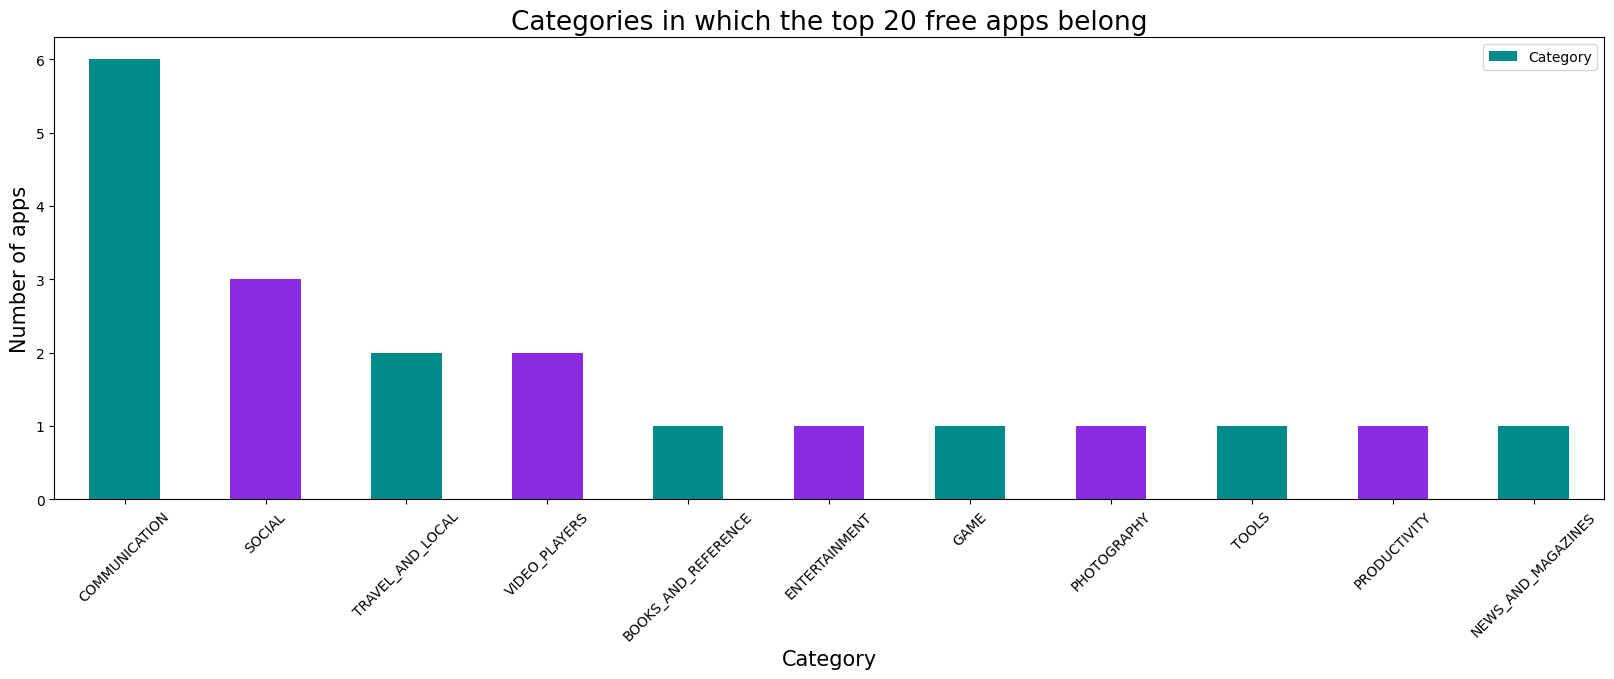

In [143]:
top_free_df['Category'].value_counts().plot.bar(figsize=(20,6), color= ('darkcyan','blueviolet'))
plt.xlabel('Category', size=15)
plt.ylabel('Number of apps', size=15)
plt.title('Categories in which the top 20 free apps belong', size=19)
plt.xticks(rotation=45)
plt.legend()

# **Top apps that are of paid type.**

In [144]:
paid_df=df[df['Type']=='Paid']

<Axes: xlabel='Price'>

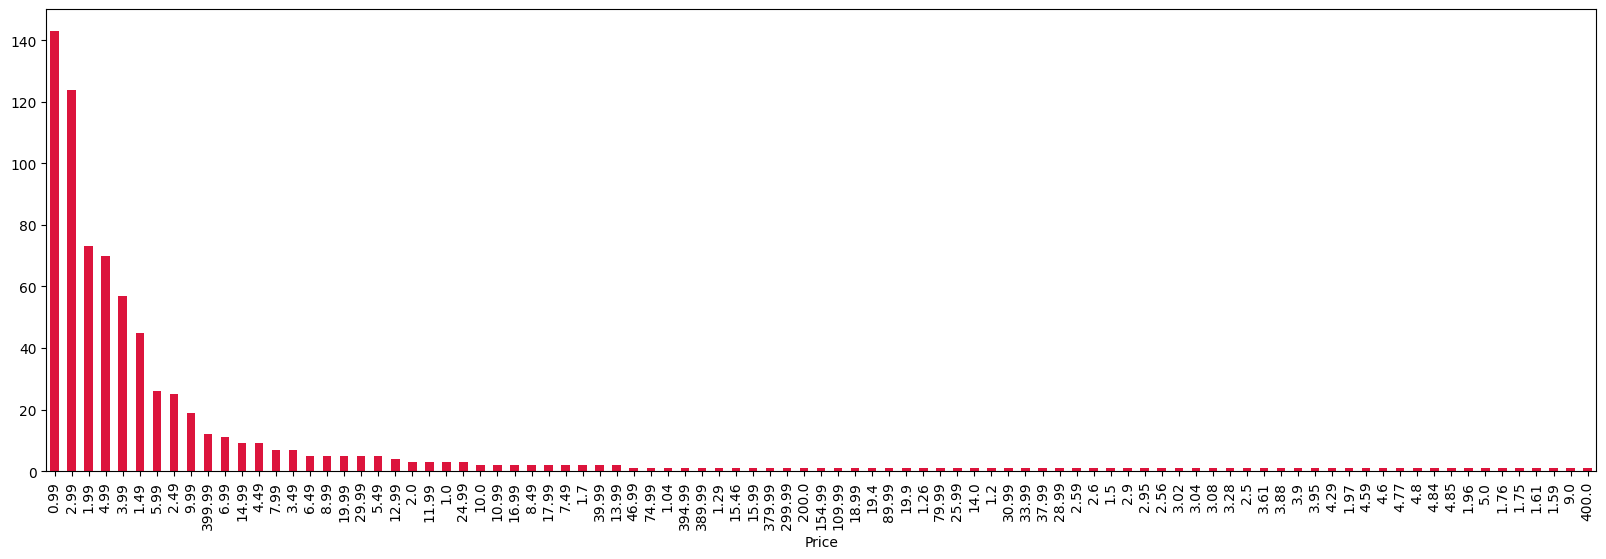

In [145]:
paid_df.groupby('Price')['App'].count().sort_values(ascending= False).plot.bar(figsize = (20,6), color = 'crimson')

Lets define a new column Revenue in paid_df which gives the revenue generated by the app through installs alone.

In [188]:
paid_df['Revenue'] = paid_df['Installs']*paid_df['Price']
paid_df.head()

<ipython-input-188-270261bc0479>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_df['Revenue'] = paid_df['Installs']*paid_df['Price']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_group,size_group,Update year,Revenue
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442.0,6.8,100000,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,Top rated,1-10,2018,499000.0
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295.0,39.0,100000,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,Top rated,30-40,2017,499000.0
427,Puffin Browser Pro,COMMUNICATION,4.0,18247.0,NaN,100000,Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up,Top rated,90 and above,2018,399000.0
476,"Moco+ - Chat, Meet People",DATING,4.2,1545.0,NaN,10000,Paid,3.99,Mature 17+,Dating,2018-06-19,2.6.139,4.1 and up,Top rated,90 and above,2018,39900.0
477,Calculator,DATING,2.6,57.0,6.2,1000,Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up,Average,1-10,2017,6990.0


In [189]:
paid_df[paid_df['Revenue'] == paid_df['Revenue'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_group,size_group,Update year,Revenue
2241,Minecraft,FAMILY,4.5,2376564.0,NaN,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,2018-07-24,1.5.2.1,Varies with device,Top rated,90 and above,2018,69900000.0


In [ ]:
top10paid_apps=paid_df.nlargest(10, 'Revenue', keep='first')
top10paid_apps['App']

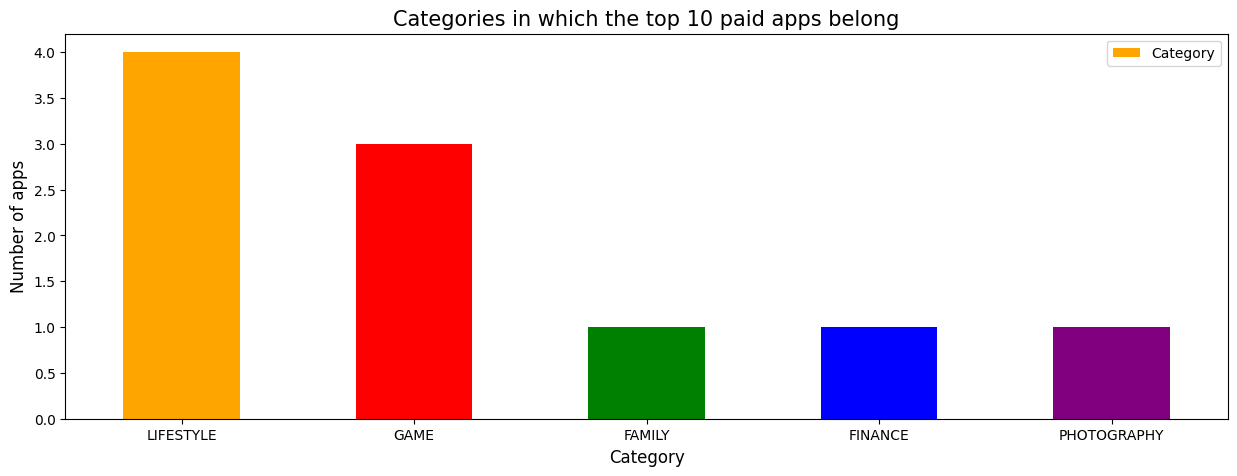

In [192]:
top10paid_apps['Category'].value_counts().plot.bar(figsize=(15,5), color= ["orange", "red", "green", "blue", "purple"])
plt.xlabel('Category',size=12)
plt.ylabel('Number of apps',size=12)
plt.title('Categories in which the top 10 paid apps belong', size=15)
plt.xticks(rotation=0)
plt.legend()

Top paid apps according to the revenue generated through installs alone

---



/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


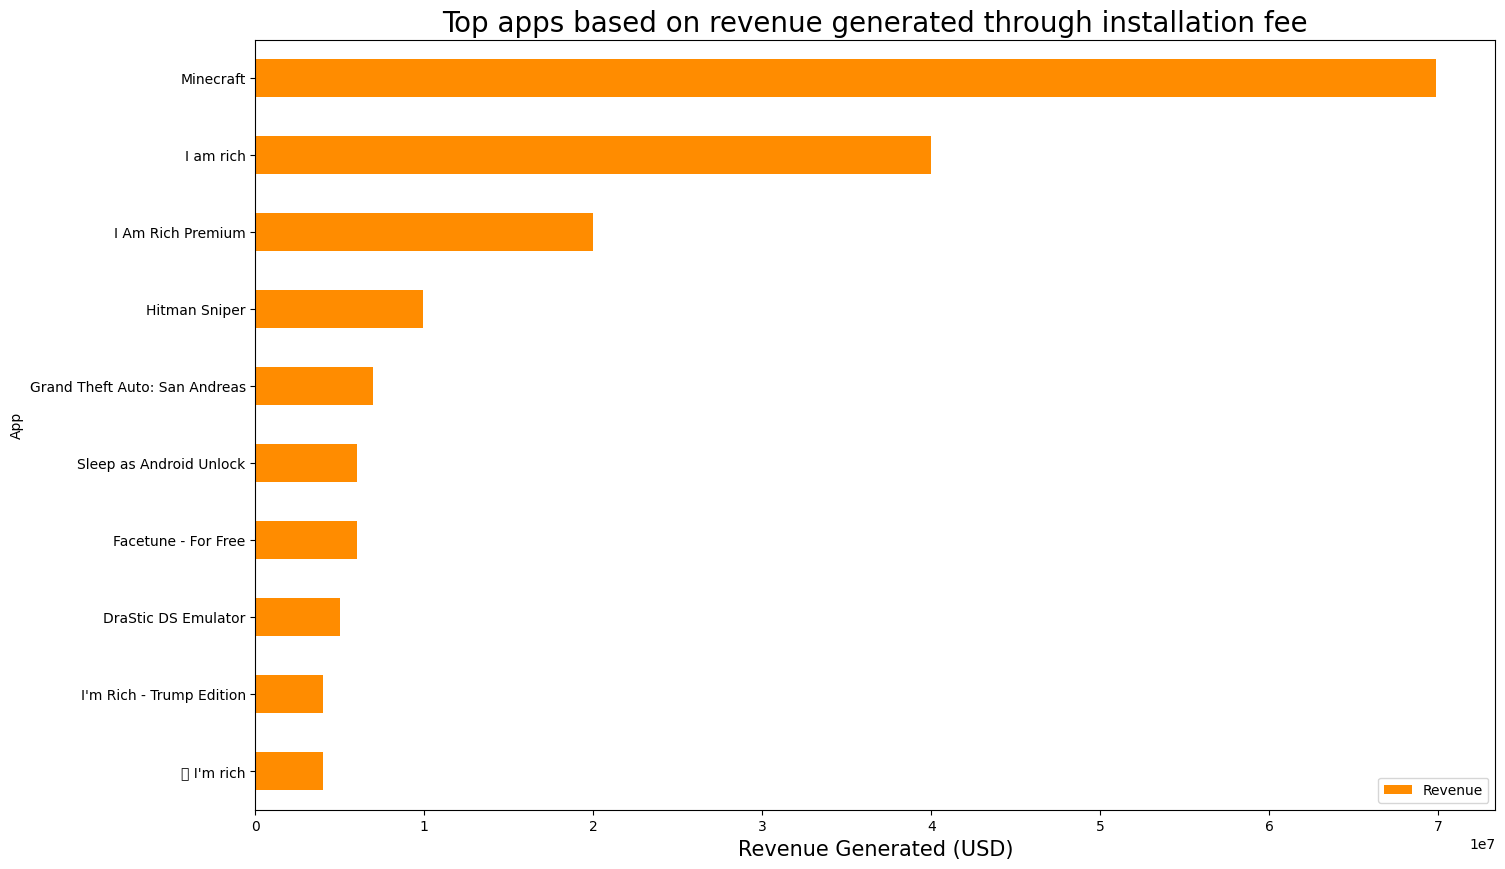

In [193]:
top10paid_apps.groupby('App')['Revenue'].mean().sort_values(ascending= True).plot.barh(figsize=(16,10), color='darkorange')
plt.xlabel('Revenue Generated (USD)', size=15)
plt.title('Top apps based on revenue generated through installation fee', size=20)
plt.legend()

In [194]:
paid_df[paid_df['Revenue'] == paid_df['Revenue'].max()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_group,size_group,Update year,Revenue
2241,Minecraft,FAMILY,4.5,2376564.0,NaN,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,2018-07-24,1.5.2.1,Varies with device,Top rated,90 and above,2018,69900000.0


In [146]:
Top_10_Apps_reviews = df.groupby('App')[['Reviews']].mean().sort_values('Reviews', ascending=False).head(10)
Top_10_Apps_reviews


,Reviews
App,
Facebook,78158306.0
WhatsApp Messenger,69119316.0
Instagram,66577313.0
Messenger – Text and Video Chat for Free,56642847.0
Clash of Clans,44891723.0
Clean Master- Space Cleaner & Antivirus,42916526.0
Subway Surfers,27722264.0
YouTube,25655305.0
"Security Master - Antivirus, VPN, AppLock, Booster",24900999.0


# **Plot the graphs of reviews, size, installs and price per rating**

In [147]:
rating_df = df.groupby('Rating').sum().reset_index()

rating_df


<ipython-input-147-4fba3dfbf9ed>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rating_df = df.groupby('Rating').sum().reset_index()


,Rating,Reviews,Size,Installs,Price
0,1.0,28.0,228.8000,5170,4.48
1,1.2,44.0,27.0000,1000,0.00
2,1.4,98.0,20.2000,7000,0.00
3,1.5,61.0,54.0000,1105,0.00
4,1.6,691.0,64.6000,152000,0.00
5,1.7,2360.0,80.3000,81700,4.99
6,1.8,3418.0,49.0870,519500,1.49
7,1.9,1874.0,154.2000,189000,0.00
8,2.0,2997.0,191.4000,5040150,4.59
9,2.1,3073.0,164.2000,182000,0.00


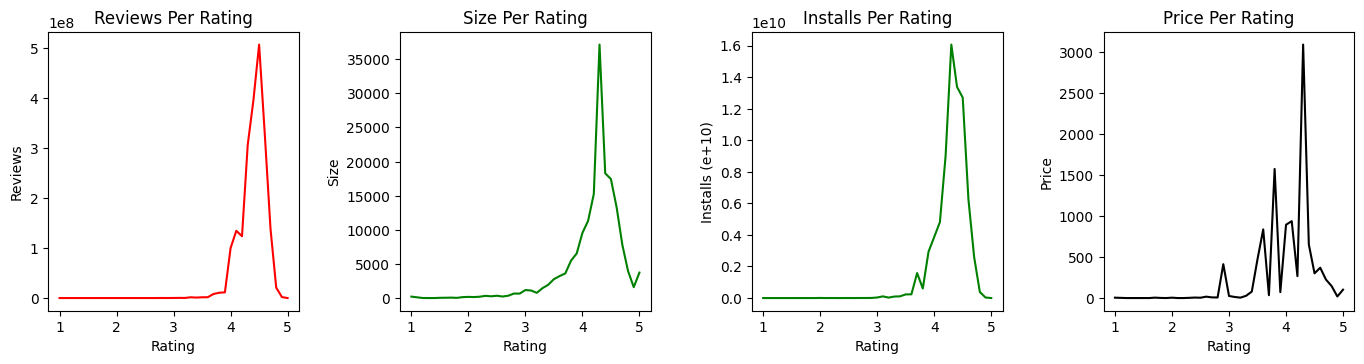

In [148]:
fig, axes = plt.subplots(1, 4, figsize=(14, 4))

axes[0].plot(rating_df['Rating'], rating_df['Reviews'], 'r')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Reviews')
axes[0].set_title('Reviews Per Rating')

axes[1].plot(rating_df['Rating'], rating_df['Size'], 'g')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Size')
axes[1].set_title('Size Per Rating')

axes[2].plot(rating_df['Rating'], rating_df['Installs'], 'g')
axes[2].set_xlabel('Rating')
axes[2].set_ylabel('Installs (e+10)')
axes[2].set_title('Installs Per Rating')

axes[3].plot(rating_df['Rating'], rating_df['Price'], 'k')
axes[3].set_xlabel('Rating')
axes[3].set_ylabel('Price')
axes[3].set_title('Price Per Rating')

plt.tight_layout(pad=2)

From the above plottings, we can observe that most of the apps with higher rating range of 4.0 - 4.7 are having high amount of reviews, size, and installs. In terms of price, it doesn't reflect a direct relationship with rating, as we could see a fluctuation in term of pricing even at the range of high rating.

# **No of apps belonging to each size group**

In [149]:
#Function to group the apps based on its size in MB

def size_apps(var):      #This function groups the size of an app between ~0 to 100 MB into certain intervals.

  try:
    if var < 1:
      return 'Below 1'
    elif var >= 1 and var <10:
      return '1-10'
    elif var >= 10 and var <20:
      return '10-20'
    elif var >= 20 and var <30:
      return '20-30'
    elif var >= 30 and var <40:
      return '30-40'
    elif var >= 40 and var <50:
      return '40-50'
    elif var >= 50 and var <60:
      return '50-60'
    elif var >= 60 and var <70:
      return '60-70'
    elif var >= 70 and var <80:
      return '70-80'
    elif var >= 80 and var <90:
      return '80-90'
    else:
      return '90 and above'
  except:
    return var

In [150]:
#Lets apply the size_group function on the Size column and store the results in a new column named Size group.

df['size_group']=df['Size'].apply(lambda x : size_apps(x))
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_group,size_group
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,Top rated,10-20
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,Above Average,10-20
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,Top rated,1-10
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,Top rated,20-30
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,Top rated,1-10


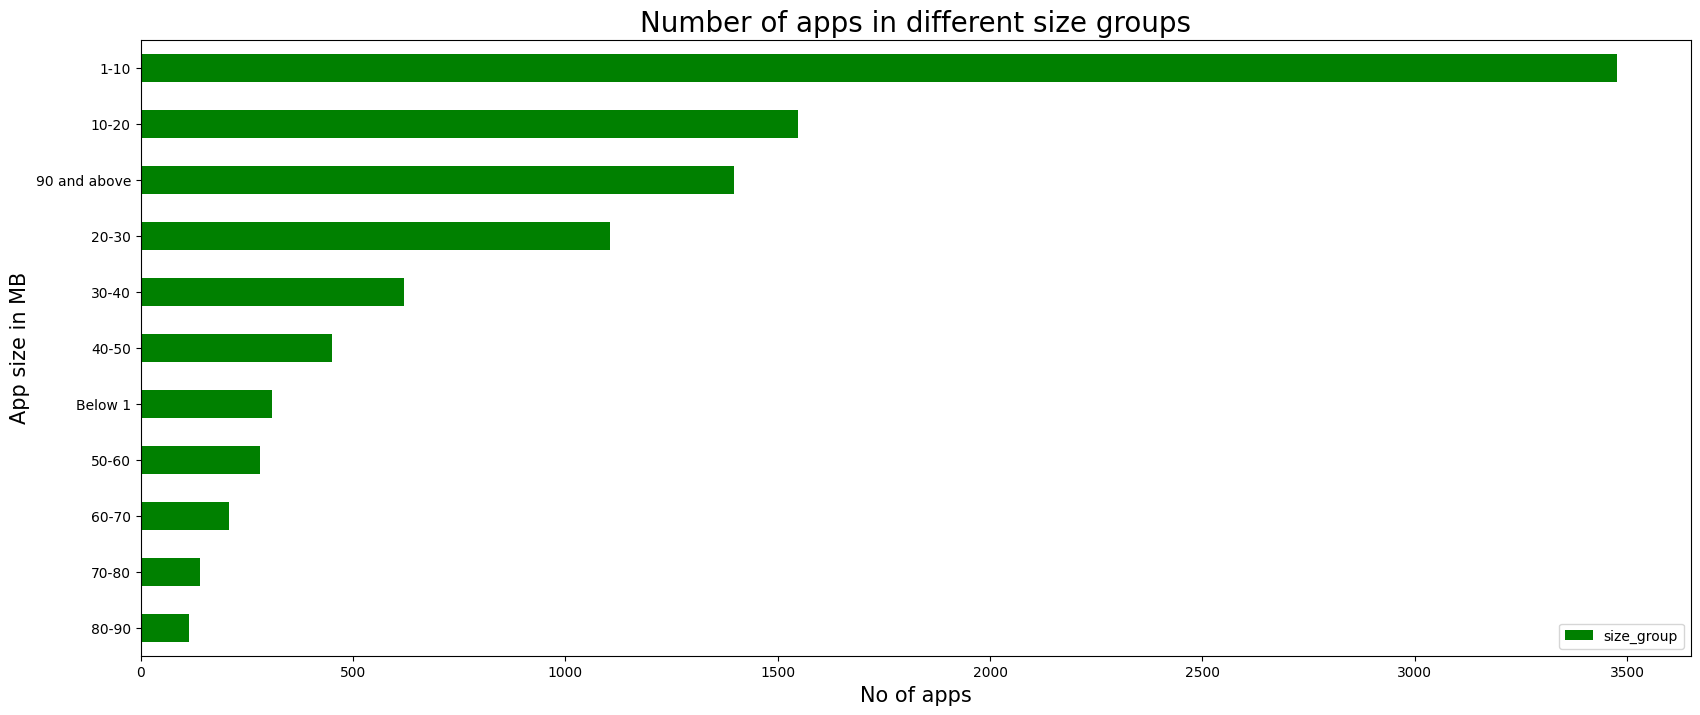

In [151]:
df['size_group'].value_counts().plot.barh(figsize=(20,8),color='g').invert_yaxis()
plt.title("Number of apps in different size groups", size=20)
plt.ylabel('App size in MB', size=15)
plt.xlabel('No of apps', size=15)
plt.legend()

# **Distribution of apps in term of their rating, size and type**

<Axes: xlabel='Size', ylabel='Rating'>

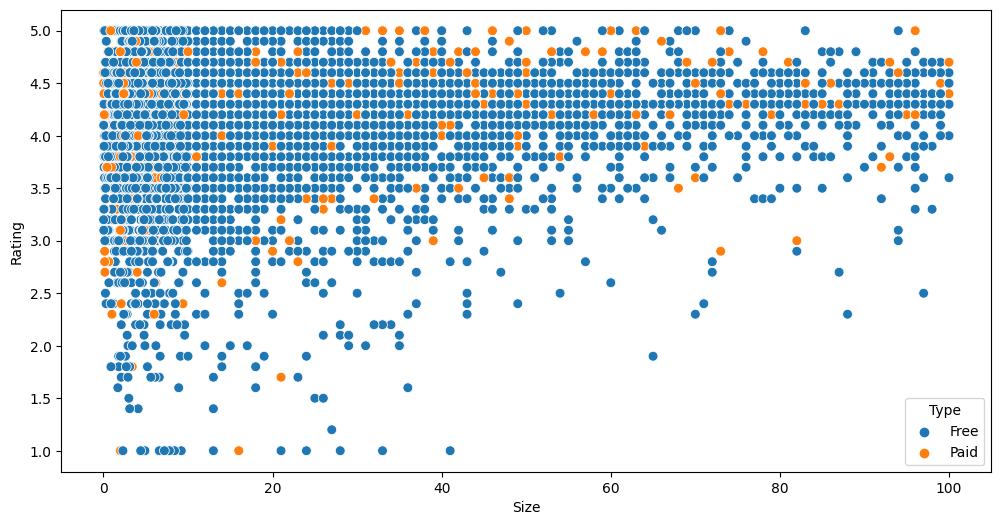

In [152]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x = df['Size'], y = df['Rating'], hue=df['Type'], s=50)


From this scatter plot, we can imply that majority of the free apps are small in size and having high rating. While for paid apps, we have quite equal distribution in term on size and rating.

In [153]:
free_df = df[df['Type'] == 'Free']

In [154]:
paid_df=df[df['Type']=='Paid']

In [155]:
print(df['Last Updated'].head())
df["Update year"] = df["Last Updated"].apply(lambda x: x.strftime('%Y')).astype('int64') 

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last Updated, dtype: datetime64[ns]


Text(0.5, 1.0, 'Update Year VS Rating')

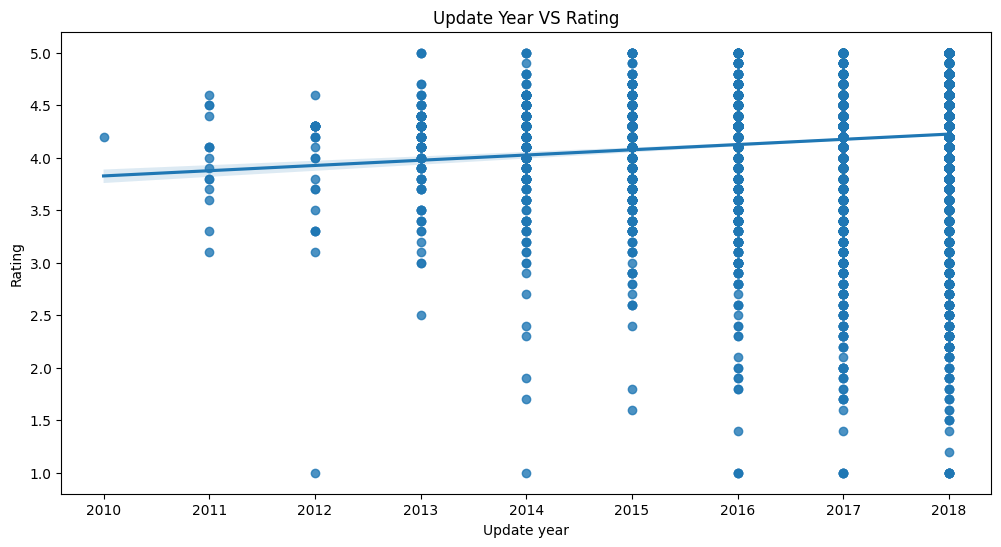

In [156]:
fig, ax = plt.subplots(figsize=(12,6))
sns.regplot(x="Update year", y="Rating", data=df)
plt.title("Update Year VS Rating")

In [157]:
paid_df["Update year"] = paid_df["Last Updated"].apply(lambda x: x.strftime('%Y')).astype('int64') 
free_df["Update year"] = free_df["Last Updated"].apply(lambda x: x.strftime('%Y')).astype('int64') 

<ipython-input-157-1b13e4c6c251>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_df["Update year"] = paid_df["Last Updated"].apply(lambda x: x.strftime('%Y')).astype('int64')
<ipython-input-157-1b13e4c6c251>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  free_df["Update year"] = free_df["Last Updated"].apply(lambda x: x.strftime('%Y')).astype('int64')


<Axes: xlabel='Update year'>

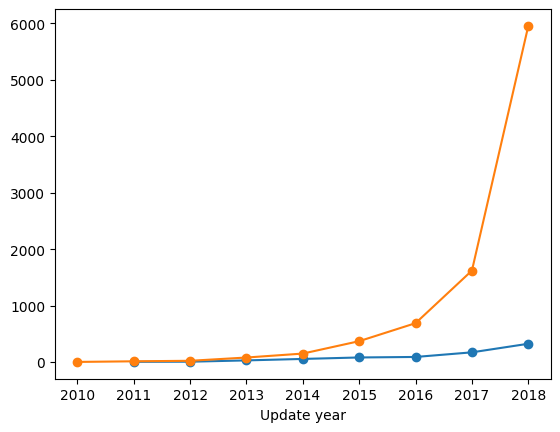

In [158]:
paid_df.groupby("Update year")["App"].count().plot.line(marker='o')
free_df.groupby('Update year')['App'].count().plot.line(marker='o')

In the above plot, we plotted the apps updated or added over the years comparing Free vs. Paid, by observing this plot we can conclude that before 2011 there were no paid apps, but with the years passing free apps has been added more in comparison to paid apps, By comparing the apps updated or added in the year 2011 and 2018 free apps are increases from 80% to 96% and paid apps are goes from 20% to 4%. So we can conclude that most of the people are after free apps

# **Correlation**



In [159]:
df.corr()

<ipython-input-159-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Rating,Reviews,Size,Installs,Price,Update year
Rating,1.000000,0.050215,0.045525,0.034310,-0.018673,0.114056
Reviews,0.050215,1.000000,0.179276,0.625158,-0.007604,0.058084
Size,0.045525,0.179276,1.000000,0.134215,-0.022492,0.207933
Installs,0.034310,0.625158,0.134215,1.000000,-0.009413,0.068853
Price,-0.018673,-0.007604,-0.022492,-0.009413,1.000000,-0.003642
Update year,0.114056,0.058084,0.207933,0.068853,-0.003642,1.000000


In [160]:
df.describe()

,Rating,Reviews,Size,Installs,Price,Update year
count,9648.000000,9.648000e+03,8422.000000,9.648000e+03,9648.000000,9648.000000
mean,4.192465,2.168369e+05,20.413946,7.786211e+06,1.100193,2017.346186
std,0.496552,1.832349e+06,21.833132,5.378830e+07,16.861727,1.137109
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000,2010.000000
25%,4.000000,2.500000e+01,4.600000,1.000000e+03,0.000000,2017.000000
50%,4.300000,9.690000e+02,12.000000,1.000000e+05,0.000000,2018.000000
75%,4.500000,2.944925e+04,28.000000,1.000000e+06,0.000000,2018.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000,2018.000000


<ipython-input-161-a740e8ca40b4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True)


<Axes: >

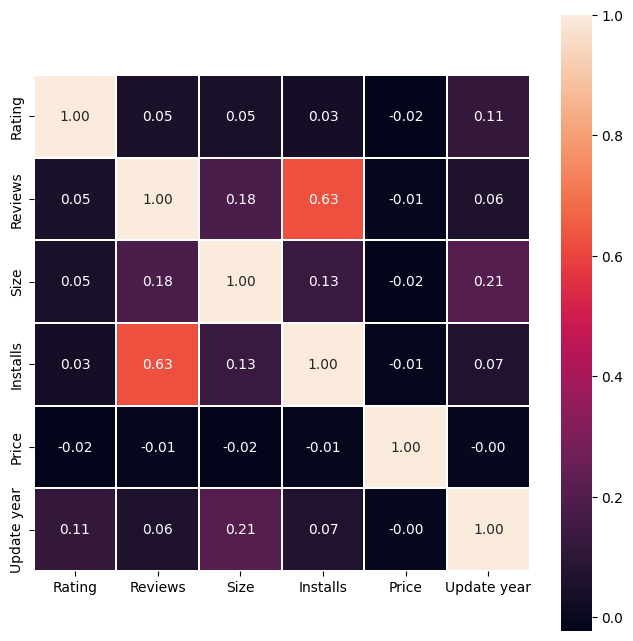

In [161]:
fig, axes = plt.subplots(figsize=(8, 8))
sns.heatmap(df.corr(), ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True)




*   There is a strong positive correlation between the Reviews and Installs column. This is pretty much obvious. Higher the number of installs, higher is the user base, and higher are the total number of reviews dropped by the users.

*   ThePriceis slightly negatively correlated with the Rating, Reviews, and Installs. This means that as the prices of the app increases, the average rating, total number of reviews and Installs fall slightly.

*   TheRating is slightly positively correlated with theInstalls and Reviews column. This indicates that as the the average user rating increases, the app installs and number of reviews also increase.





In [162]:
user_reviews_df = pd.read_csv("/content/drive/MyDrive/PlayStore App Review Analysis/User Reviews.csv")
user_reviews_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [163]:
user_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [164]:
user_reviews_df['App'].value_counts()

Angry Birds Classic                                  320
CBS Sports App - Scores, News, Stats & Watch Live    320
Bowmasters                                           320
8 Ball Pool                                          300
Helix Jump                                           300
                                                    ... 
Easy Healthy Recipes                                  31
Dresses Ideas & Fashions +3000                        31
Detector de Radares Gratis                            31
Easy Hair Style Design                                30
Drawing Clothes Fashion Ideas                         30
Name: App, Length: 1074, dtype: int64

Checking for null values

In [165]:
user_reviews_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

Removing all null values

In [166]:
user_reviews_df[user_reviews_df['Translated_Review'].notna()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


In [167]:
user_reviews_df = user_reviews_df.dropna()

# **Let us check if there is any co-relation in both the dataframes.**

Lets merge two data frames

In [168]:
merged_df = pd.merge(df, user_reviews_df, on='App', how = "inner")
merged_df


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_group,size_group,Update year,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,Above Average,10-20,2018,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,Above Average,10-20,2018,It bad >:(,Negative,-0.725000,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,Above Average,10-20,2018,like,Neutral,0.000000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,Above Average,10-20,2018,I love colors inspyering,Positive,0.500000,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,Above Average,10-20,2018,I hate,Negative,-0.800000,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35924,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941.0,NaN,10000000,Free,0.0,Everyone,Photography,2018-08-06,Varies with device,Varies with device,Top rated,90 and above,2018,Overall great app. Best gallery seen far,Positive,0.475000,0.512500
35925,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941.0,NaN,10000000,Free,0.0,Everyone,Photography,2018-08-06,Varies with device,Varies with device,Top rated,90 and above,2018,"Recommended, 100% love it, keep good work dev ...",Positive,0.566667,0.733333
35926,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941.0,NaN,10000000,Free,0.0,Everyone,Photography,2018-08-06,Varies with device,Varies with device,Top rated,90 and above,2018,Too much ads,Positive,0.200000,0.200000
35927,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941.0,NaN,10000000,Free,0.0,Everyone,Photography,2018-08-06,Varies with device,Varies with device,Top rated,90 and above,2018,Just allow time ...,Neutral,0.000000,0.000000


In [169]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35929 entries, 0 to 35928
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   App                     35929 non-null  object        
 1   Category                35929 non-null  object        
 2   Rating                  35929 non-null  float64       
 3   Reviews                 35929 non-null  float64       
 4   Size                    24069 non-null  float64       
 5   Installs                35929 non-null  int64         
 6   Type                    35929 non-null  object        
 7   Price                   35929 non-null  float64       
 8   Content Rating          35929 non-null  object        
 9   Genres                  35929 non-null  object        
 10  Last Updated            35929 non-null  datetime64[ns]
 11  Current Ver             35929 non-null  object        
 12  Android Ver             35929 non-null  object

Correlation of merged data frame

In [170]:
merged_df.corr()

<ipython-input-170-5805580b1846>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_df.corr()


,Rating,Reviews,Size,Installs,Price,Update year,Sentiment_Polarity,Sentiment_Subjectivity
Rating,1.000000,0.075736,0.167530,0.020145,-0.010055,0.257390,0.092903,0.068758
Reviews,0.075736,1.000000,0.430137,0.564256,-0.020591,0.079162,-0.080021,-0.009315
Size,0.167530,0.430137,1.000000,0.213743,-0.019787,0.253506,-0.159389,0.009186
Installs,0.020145,0.564256,0.213743,1.000000,-0.025213,0.092477,-0.057842,-0.006307
Price,-0.010055,-0.020591,-0.019787,-0.025213,1.000000,-0.113076,0.024148,0.003182
Update year,0.257390,0.079162,0.253506,0.092477,-0.113076,1.000000,0.003992,-0.010462
Sentiment_Polarity,0.092903,-0.080021,-0.159389,-0.057842,0.024148,0.003992,1.000000,0.259668
Sentiment_Subjectivity,0.068758,-0.009315,0.009186,-0.006307,0.003182,-0.010462,0.259668,1.000000


Heatmap of Correlation of merged df

<ipython-input-171-a7dc19926233>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df.corr(), annot= True, cmap='autumn')


Text(0.5, 1.0, ' Heatmap for merged Dataframe')

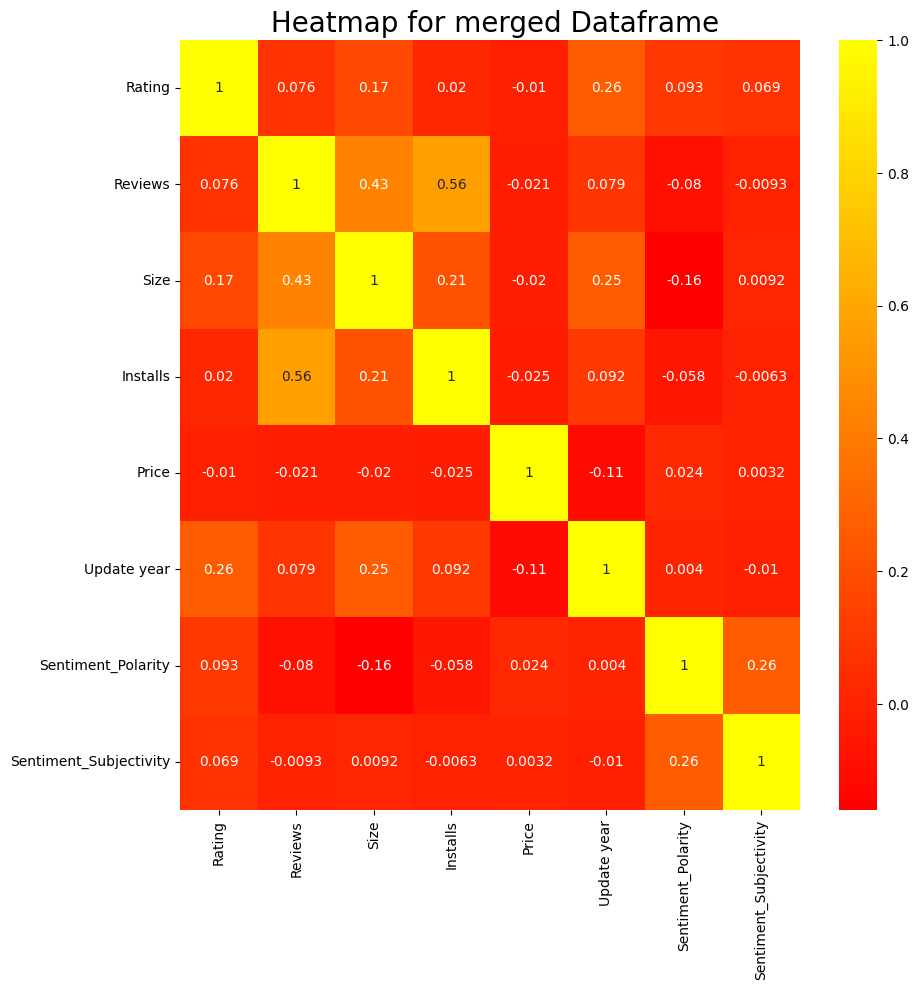

In [171]:
plt.figure(figsize = (10,10))
sns.heatmap(merged_df.corr(), annot= True, cmap='autumn')
plt.title(' Heatmap for merged Dataframe', size=20)

# **Data Visualization on User Reviews**

# Review Sentiments

In [172]:
Review_sentiments = user_reviews_df['Sentiment'].value_counts()


In [173]:
labels ='Positive Reviews', 'Negative Reviews','Neutral Reviews'

Text(0.5, 1.0, 'Percentage of Review Sentiments')

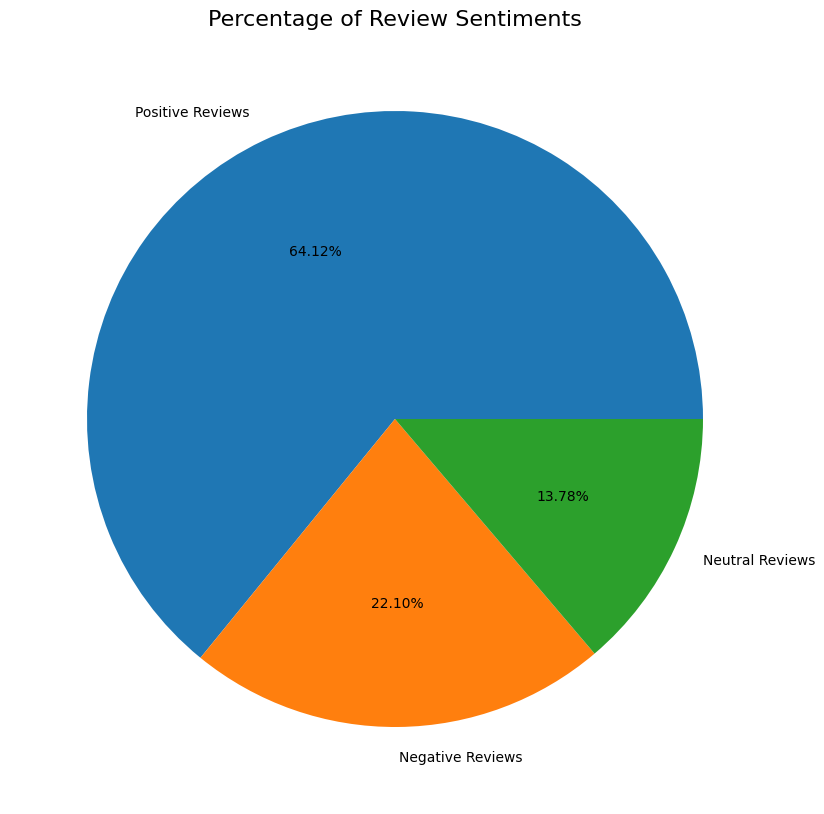

In [174]:
plt.figure(figsize = (10,10))
plt.pie(Review_sentiments, labels = labels ,autopct="%.2f%%" )
plt.title('Percentage of Review Sentiments', fontsize=16,)



*   Positive reviews are 64.12%
*   Negative reviews are 22.10%
*   Neutral reviews are 13.78%





Apps with the highest number of positive reviews

In [175]:
positive_df=user_reviews_df[user_reviews_df['Sentiment']=='Positive']
positive_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [176]:
Top_positive_review_apps =positive_df.groupby('App')['Sentiment'].value_counts().nlargest(10)
Top_positive_review_apps

App                             Sentiment
Helix Jump                      Positive     209
Duolingo: Learn Languages Free  Positive     200
Calorie Counter - Macros        Positive     174
Bowmasters                      Positive     169
Calorie Counter - MyFitnessPal  Positive     169
10 Best Foods for You           Positive     162
Google Photos                   Positive     143
8fit Workouts & Meal Planner    Positive     137
Garena Free Fire                Positive     136
DRAGON BALL LEGENDS             Positive     127
Name: Sentiment, dtype: int64

Text(0.5, 0, 'Total no of positive reviews')

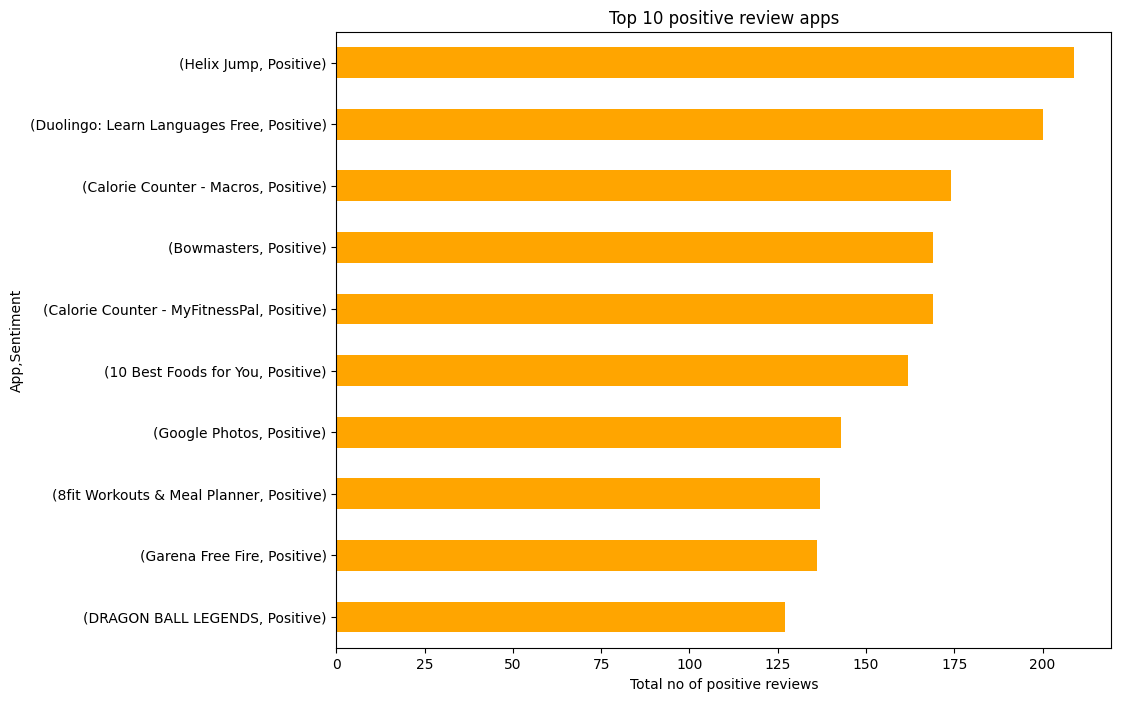

In [177]:
Top_positive_review_apps.plot.barh(figsize=(10,8),color='orange').invert_yaxis()
plt.title("Top 10 positive review apps")
plt.xlabel('Total no of positive reviews')

Apps with the highest number of negative reviews

In [178]:
negative_df=user_reviews_df[user_reviews_df['Sentiment']=='Negative']
negative_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500,0.500
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200,0.000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200,0.000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800,0.800
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325,0.475


Text(0.5, 0, 'Total number of negative reviews')

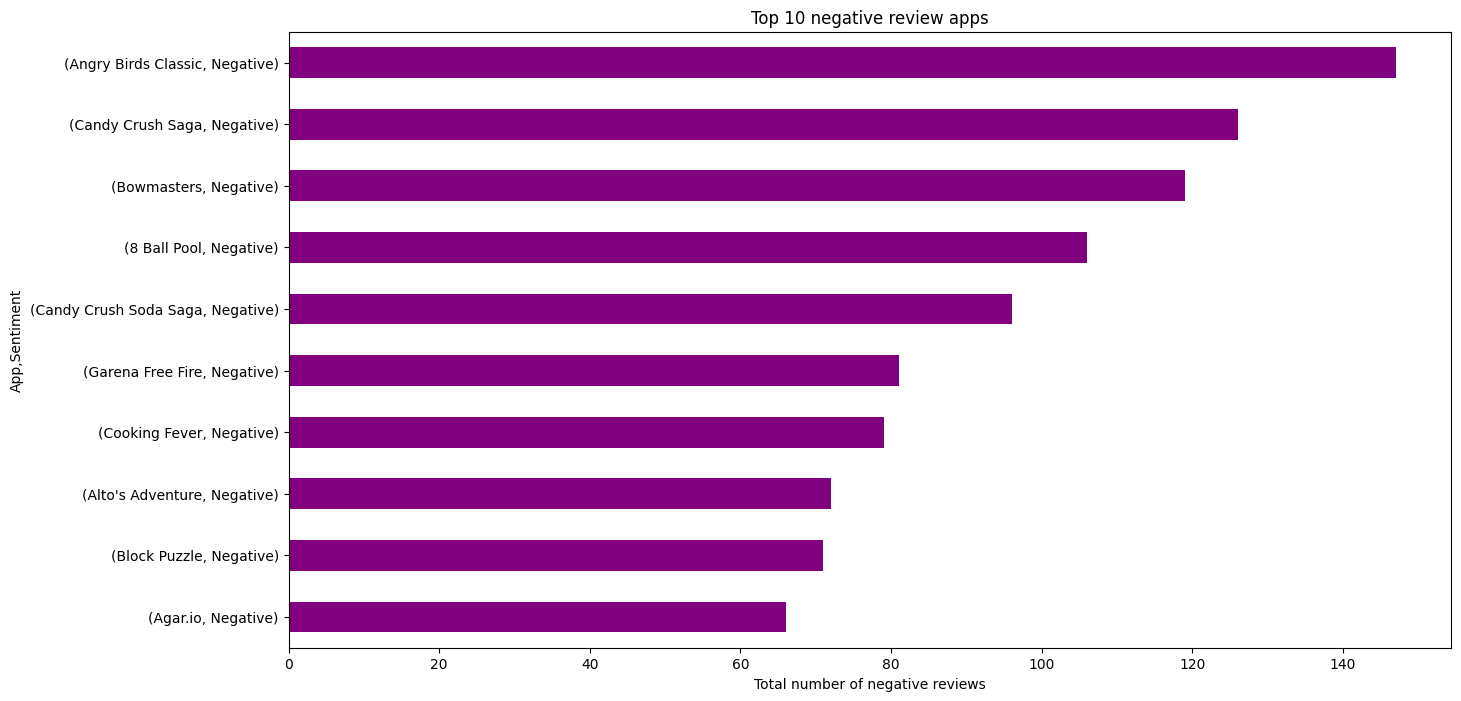

In [179]:
negative_df.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(15,8),color='purple').invert_yaxis()
plt.title("Top 10 negative review apps")
plt.xlabel('Total number of negative reviews')

# **App content Rating**

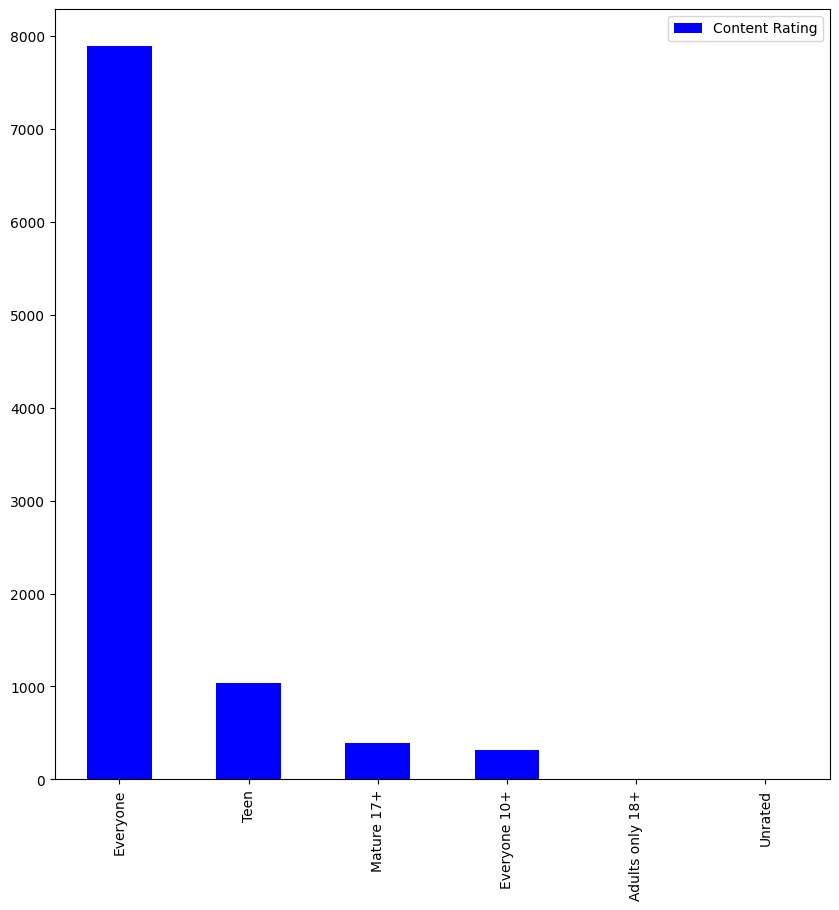

In [180]:
df['Content Rating'].value_counts().plot.bar(figsize=(10,10),color='blue')
plt.legend()

Apps which are designed for everyone has got most no of ratings.

# **Percentage of App by their content rating**

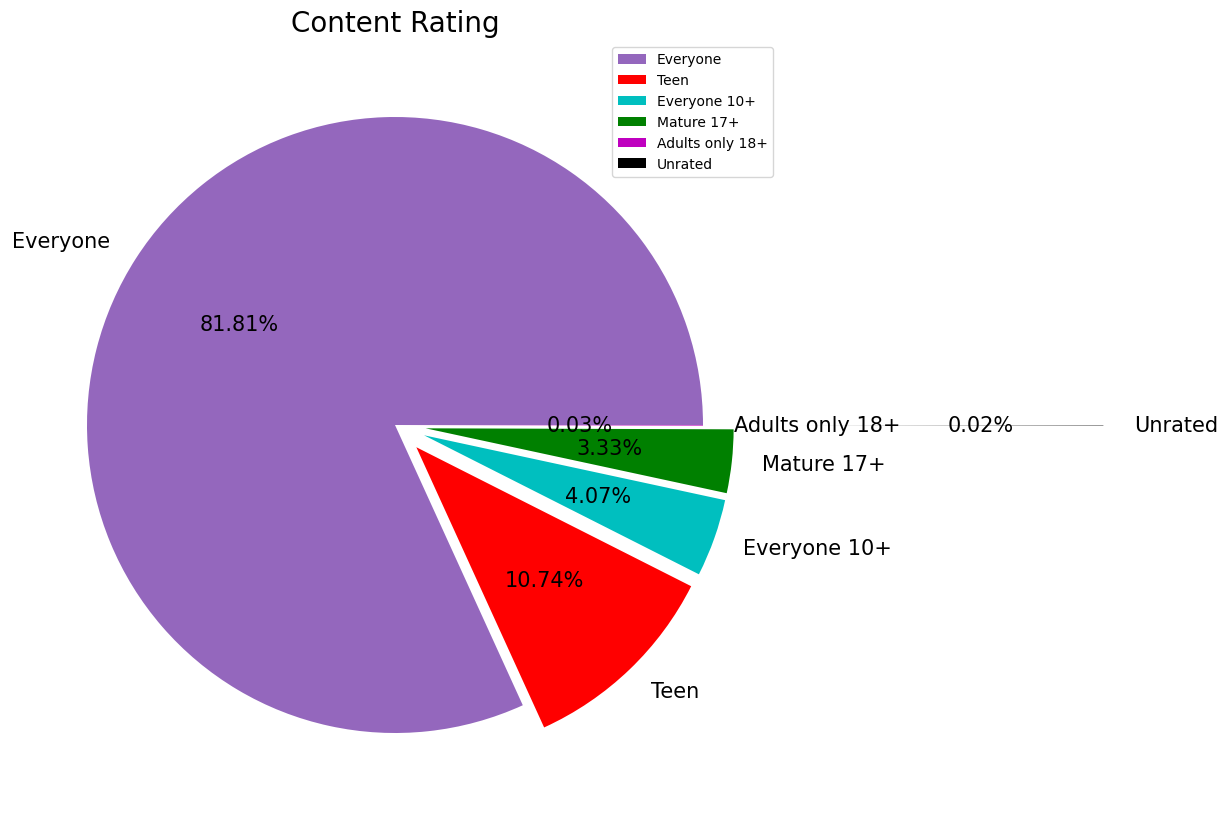

In [181]:
data = df['Content Rating'].value_counts()
labels = ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+','Adults only 18+', 'Unrated']

#pie chart
plt.figure(figsize=(10,10))
explode=(0,0.1,0.1,0.1,0.0,1.3)
colors = ['C4', 'r', 'c', 'g', 'm', 'k']
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.title('Content Rating',size=20,loc='center')
plt.legend()

# **Top categories on Playstore**

In [182]:
df.groupby("Category")["App"].count().sort_values(ascending= False)

Category
FAMILY                 1828
GAME                    959
TOOLS                   825
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         374
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     221
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       83
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           63
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: App, dtype: int64

In [183]:
x = df['Category'].value_counts()
y = df['Category'].value_counts().index
x_list = []
y_list = []
for i in range(len(x)):
    x_list.append(x[i])
    y_list.append(y[i])

**Number of apps belonging to each category in Playstore**

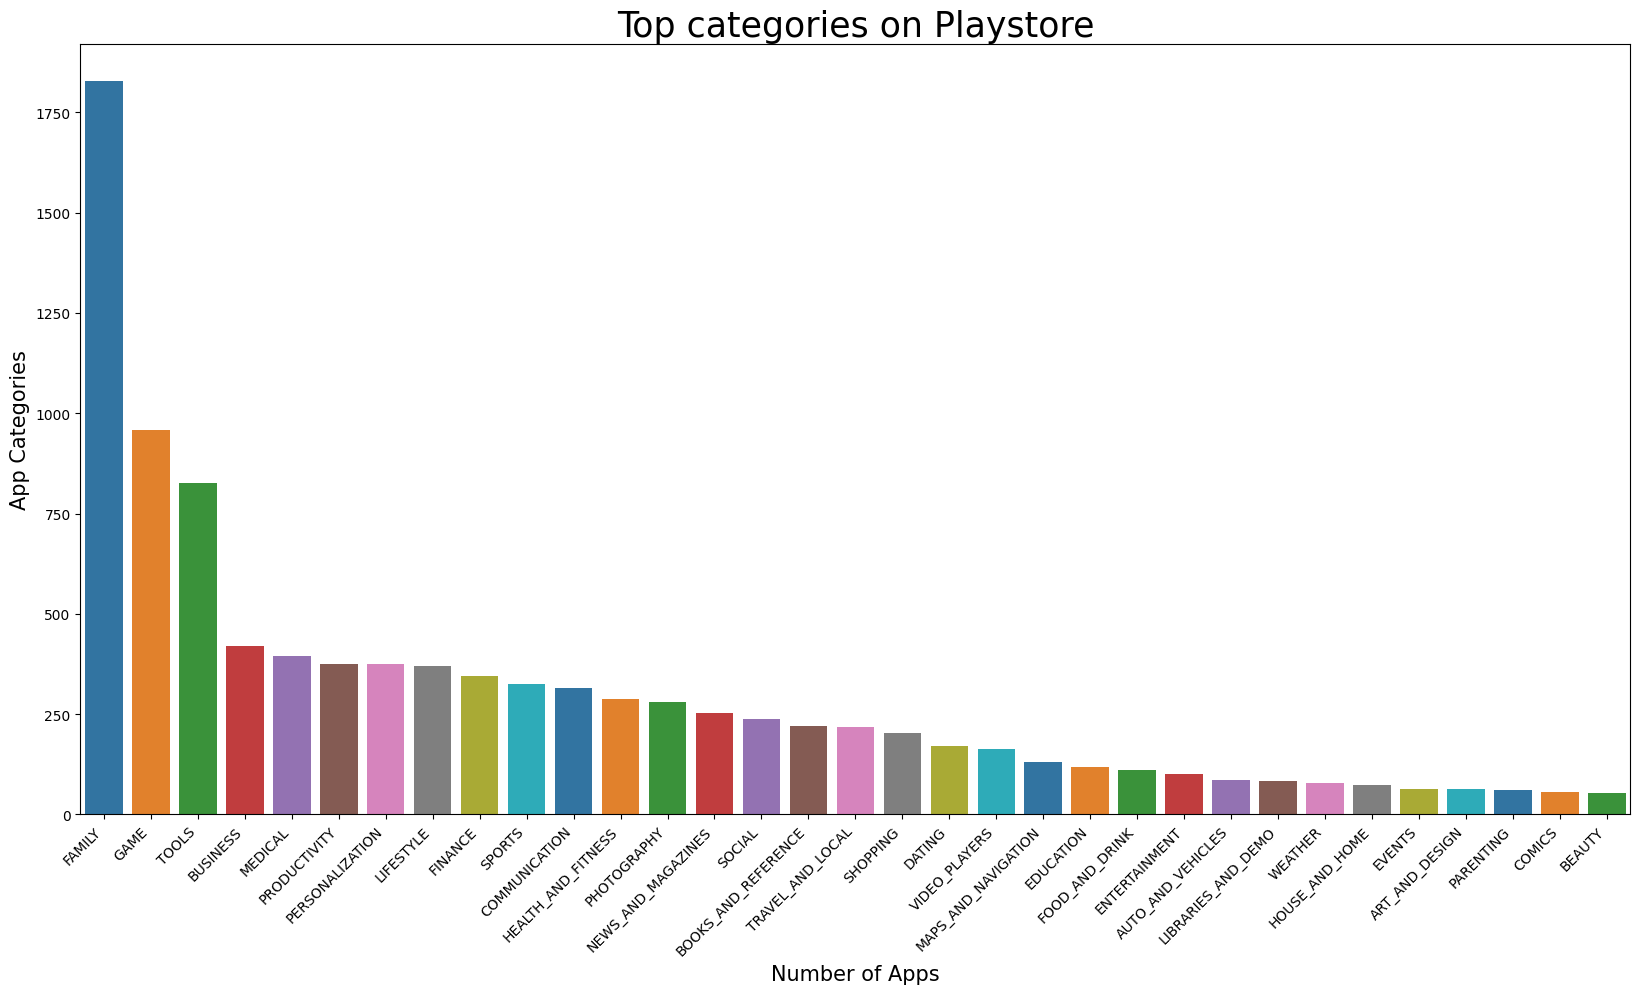

In [184]:
plt.figure(figsize=(20,10))
plt.xlabel('Number of Apps', size=15)
plt.ylabel('App Categories', size=15)
graph = sns.barplot(y = x_list, x = y_list, palette= "tab10")
graph.set_title("Top categories on Playstore", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right',);

# **Subjectivity**

In [185]:
merged_df.Sentiment_Subjectivity.value_counts()

0.000000    4134
1.000000    1653
0.500000    1579
0.600000    1133
0.750000    1095
            ... 
0.508052       1
0.454167       1
0.417316       1
0.765000       1
0.545714       1
Name: Sentiment_Subjectivity, Length: 4382, dtype: int64

(array([4297.,  628., 2544., 2873., 5466., 7930., 5506., 2900., 1436.,
        2349.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

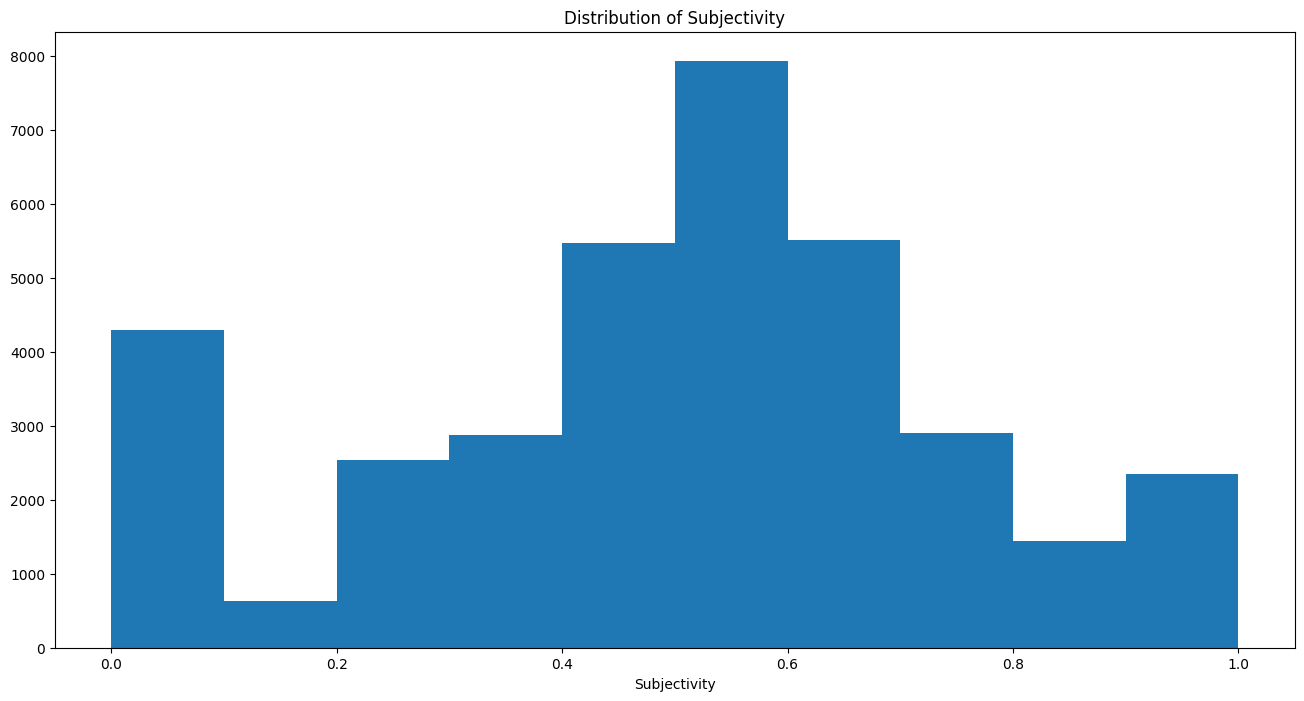

In [186]:
plt.figure(figsize=(16,8))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(merged_df[merged_df['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])

0 - objective(fact), 1 - subjective(opinion)

It can be seen that maximum number of sentiment subjectivity is between 0.4 to 0.7. From this we can conclude that maximum number of users gave reviews to the applications according to their experience.

# **Sentiment polarity and sentiment subjectivity**

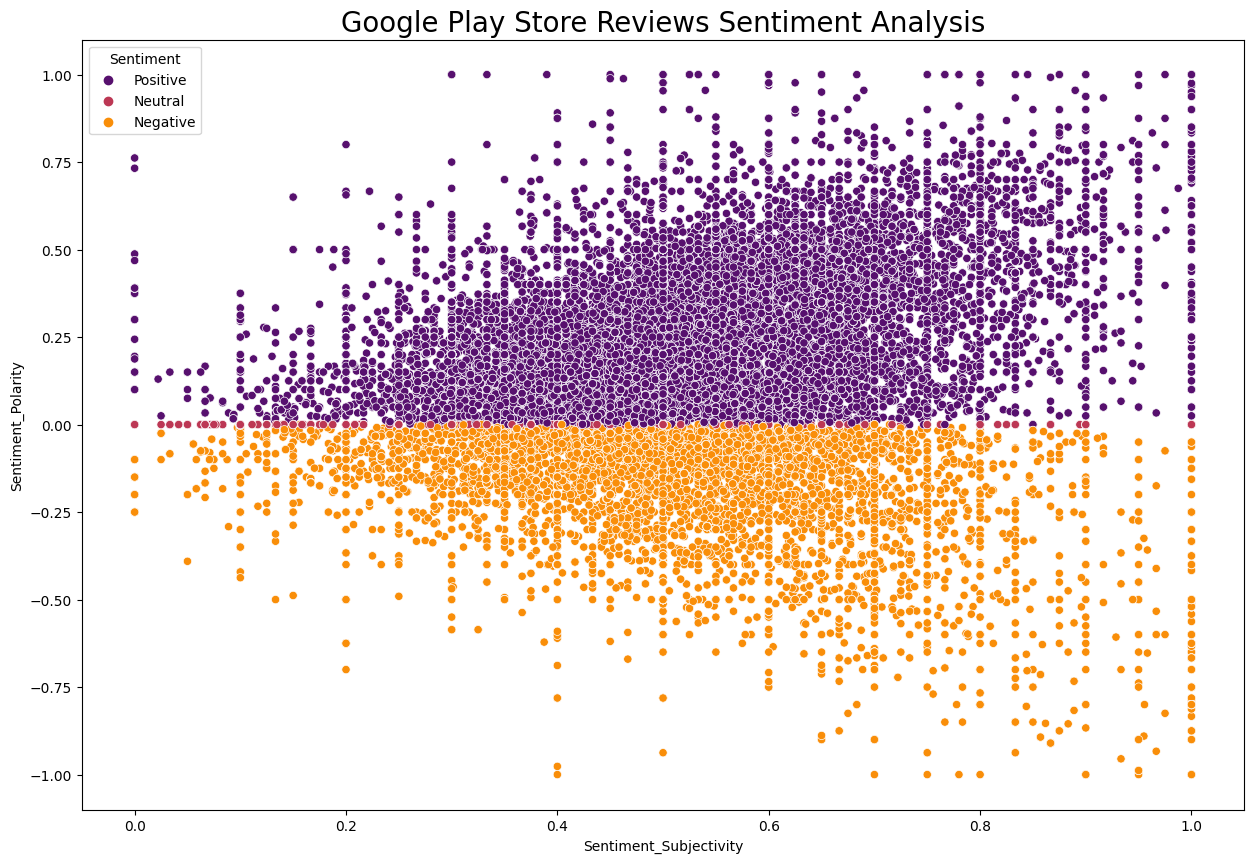

In [187]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x = user_reviews_df['Sentiment_Subjectivity'], y =  user_reviews_df['Sentiment_Polarity'],
                hue = user_reviews_df['Sentiment'], edgecolor='white', palette="inferno")
plt.title("Google Play Store Reviews Sentiment Analysis", fontsize=20)
plt.show()

From the above scatter plot it can be concluded that sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case, shows a proportional behavior, when variance is too high or low

# **Analysis Summary**

In this project of analyzing play store applications, we have worked on several parameters which would help Businesses to do well in launching their apps on the play store.

In the initial phase, we focused more on the problem statements and data cleaning, in order to ensure that we give them the best results out of our analysis.

Businesses needs to focus more on:

1) Developing apps related to the least categories as they are not explored much. Like events and beauty.

2)Most of the apps are Free, so focusing on free apps is more important.

3)Focusing more on content available for Everyone will increase the chances of getting the highest installs.

4)They need to focus on updating their apps regularly, so that it will attract more users.

5)They need to keep in mind that the sentiments of the user keep varying as they keep using the app, so they should focus more on users needs and features.

**Findings:**

-Percentage of free apps = ~92%

-Percentage of apps with no age restrictions = ~81.8%

-Most competitive category: Family

-Category with the highest app installs: Game

-Majority of the apps are Top Rated.

-Family, Game and Tools are top three categories having 1828, 959 and 825 app count.

-Tools, Entertainment, Education, Buisness and Medical are top Genres.

-There is a strong positive correlation between the Reviews and Installs column. This is pretty much obvious. Higher the number of installs, higher is the user base, and higher are the total number of reviews dropped by the users.

-Helix Jump has the highest number of positive reviews and Angry Birds Classic has the highest number of negative reviews.

-Overall sentiment count of merged dataset in which Positive sentiment count is 64.12%, Negative 22.10% and Neutral 13.78%.